![image](https://drive.google.com/u/0/uc?id=15DUc09hFGqR8qcpYiN1OajRNaASmiL6d&export=download)

# **Taller No. 1 - ISIS4825**
## **Proceso de Aprendizaje Automático e Introducción a la Clasificación**
## **Contenido**
1. [**Objetivos**](#id1)
2. [**Problema**](#id2)
3. [**Importando las librerías necesarias para el laboratorio**](#id3)
4. [**Visualización y Análisis Exploratorio**](#id4)
5. [**Preparación de los Datos**](#id5)
6. [**Modelamiento**](#id6)
7. [**Predicción**](#id7)
8. [**Validación**](#id8)

## **Objetivos**<a name="id1"></a>
- Familiarizarse con las librerías de Scikit-Learn y con el algoritmo de KNN
- Resolver un problema de clasificación multiclase y tomar métricas de desempeño sobre este
## **Problema**<a name="id2"></a>

## **Importando las librerías necesarias para el laboratorio**<a name="id3"></a>

In [41]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit

import utils.general as gen

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

## **Visualización y Análisis Exploratorio**<a name="id4"></a>
- Vamos a hacer uso del Dataset `Fashion-MNIST` que consta de 10 clases:
    0. T-Shirt/Top
    1. Trouser
    2. Pullover
    3. Dress
    4. Coat
    5. Sandal
    6. Shirt 
    7. Sneaker
    8. Bag
    9. Ankle Boot
- De igual forma, el dataset tiene 70.000 imágenes en escala de rises con resolución 28x28. Sin embargo, las imágenes ya se encuentran aplanadas con tamaño ed vector 784.

In [3]:
fashion_mnist = datasets.fetch_openml("Fashion-MNIST")

In [4]:
data, target = fashion_mnist.data, fashion_mnist.target

In [5]:
data.shape, target.shape

((70000, 784), (70000,))

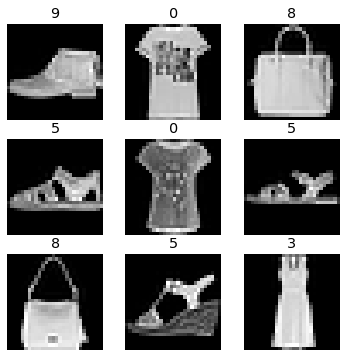

In [19]:
random_sample = np.random.choice(np.arange(len(data)), 9)
gen.visualize_subplot(
    data[random_sample].reshape(-1, 28, 28),
    target[random_sample],  (3, 3), (6, 6)
)

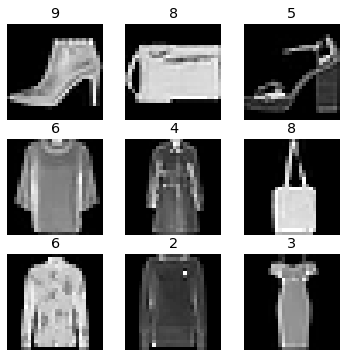

In [21]:
random_sample = np.random.choice(np.arange(len(data)), 9)
gen.visualize_subplot(
    data[random_sample].reshape(-1, 28, 28),
    target[random_sample],  (3, 3), (6, 6)
)

In [30]:
target_classes = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", 
                  "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [31]:
target_distribution = pd.Series(target).value_counts().sort_index()
target_distribution.index = target_classes

In [32]:
target_distribution

T-Shirt/Top    7000
Trouser        7000
Pullover       7000
Dress          7000
Coat           7000
Sandal         7000
Shirt          7000
Sneaker        7000
Bag            7000
Ankle Boot     7000
dtype: int64

## **Preparación de los Datos**<a name="id5"></a>
- Dado que estamos trabajando con modelos de Machine Learning superficial, vamos a necesitar que todas nuestras imágenes sean convertidas a vectores, si es que aún no lo son.

### **Tratamiento de Imágenes**

In [36]:
sample_img = data[0].reshape(28, 28)
sample_target = target[0]

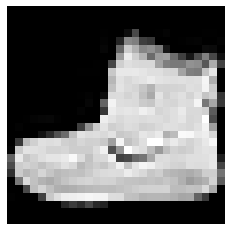

In [35]:
gen.imshow(sample_img, color=False)

In [37]:
sample_img.shape

(28, 28)

In [38]:
sample_img = sample_img.flatten()

In [40]:
sample_img.shape

(784,)

### **Train Set, Validation Set, Test Set**
- Generalmente, en el mundo del computer vision, se hace la siguiente partición de datasets:
    - Train Data:
        - Train Set
        - Validation Set
    - Test Data:
        - Test Set
- La partición de los datasets la podemos hacer de varias formas, pero en esta ocasión veremos la partición por índices y por contenido.
#### **Partición por Índice**

In [83]:
ss_full_train_test = ShuffleSplit(n_splits=10, test_size=10000, random_state=1234)

In [84]:
for full_train_index, test_index in ss_full_train_test.split(data):
    pass

In [85]:
full_train_index

array([19943, 47252, 57588, ..., 54124, 44717,  9762])

In [86]:
test_index

array([58047, 28080, 17271, ..., 22265, 61617, 14466])

In [91]:
full_train_set, test_set = ((data[full_train_index], target[full_train_index]), 
                            (data[test_index], target[test_index]))

In [92]:
ss_train_val = ShuffleSplit(n_splits=10, test_size=10000, random_state=5678)

In [99]:
for train_index, val_index in ss_train_val.split(full_train_set[0]):
    pass

In [106]:
train_set, val_set = ((full_train_set[0][train_index], full_train_set[1][train_index]), 
                      (full_train_set[0][val_index], full_train_set[1][val_index]))

In [107]:
X_train, y_train = train_set[0], train_set[1]
X_val, y_val = val_set[0], val_set[1]
X_test, y_test = test_set[0], test_set[1]

In [108]:
X_train.shape, y_train.shape

((50000, 784), (50000,))

In [109]:
X_val.shape, y_val.shape

((10000, 784), (10000,))

In [111]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

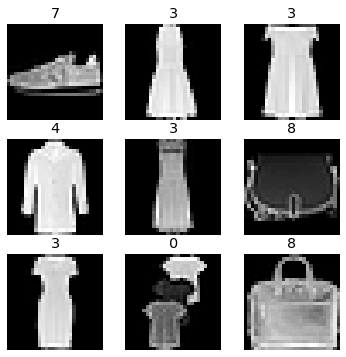

In [112]:
random_sample = np.random.choice(np.arange(len(X_train)), 9)
gen.visualize_subplot(
    X_train[random_sample].reshape(-1, 28, 28),
    y_train[random_sample],  (3, 3), (6, 6)
)

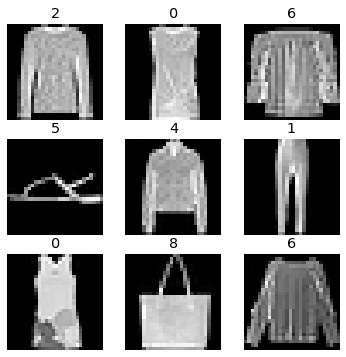

In [113]:
random_sample = np.random.choice(np.arange(len(X_val)), 9)
gen.visualize_subplot(
    X_val[random_sample].reshape(-1, 28, 28),
    y_val[random_sample],  (3, 3), (6, 6)
)

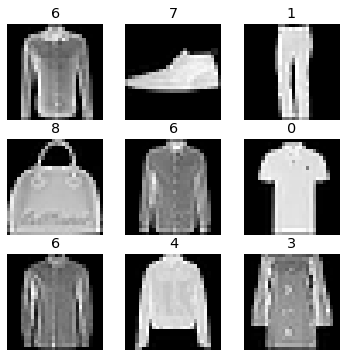

In [115]:
random_sample = np.random.choice(np.arange(len(X_test)), 9)
gen.visualize_subplot(
    X_test[random_sample].reshape(-1, 28, 28),
    y_test[random_sample],  (3, 3), (6, 6)
)

#### **Partición por Contenido**

In [120]:
full_X_train, X_test, full_y_train, y_test = train_test_split(data, target, 
                                                              test_size=10000, 
                                                              random_state=1234)

In [124]:
X_train, X_val, y_train, y_val = train_test_split(full_X_train, full_y_train, 
                                                  test_size=10000, 
                                                  random_state=1234)

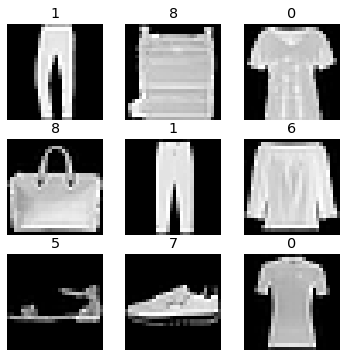

In [125]:
random_sample = np.random.choice(np.arange(len(X_train)), 9)
gen.visualize_subplot(
    X_train[random_sample].reshape(-1, 28, 28),
    y_train[random_sample],  (3, 3), (6, 6)
)

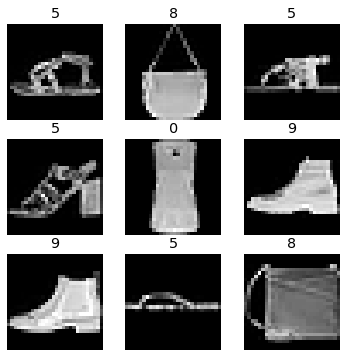

In [126]:
random_sample = np.random.choice(np.arange(len(X_val)), 9)
gen.visualize_subplot(
    X_val[random_sample].reshape(-1, 28, 28),
    y_val[random_sample],  (3, 3), (6, 6)
)

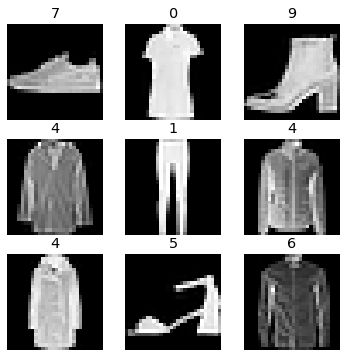

In [127]:
random_sample = np.random.choice(np.arange(len(X_test)), 9)
gen.visualize_subplot(
    X_test[random_sample].reshape(-1, 28, 28),
    y_test[random_sample],  (3, 3), (6, 6)
)

## **Modelamiento**<a name="id6"></a>
### **K-Nearest-Neighbors**

## **Predicción**<a name="id7"></a>

## **Validación**<a name="id8"></a>